In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
import warnings

warnings.filterwarnings("ignore")

### Задание 1.1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Пусть:
- $G$ (gulity) - подсудимый виновен
- $\overline{G}$ (not gulity) - подсудимый невиновен
- $B$ (blood) - у подсудимого редкая группа крови



Прокурор оценил вероятность $P(B)$ того, что у подсудимого редкая группа крови, которая была найдена на месте убиства. 

А должен был оценить $P(G|B)$ вероятность того, что подозреваемый - убийца, при условии, что у подозреваемого редкая группа крови.

$P(G|B) = \frac{P(G) P(B| G)}{P(B)} =
\frac{P(G) P(B| G)}{P(B|G)P(G) + P(B|\overline{G})P(\overline{G})}$

Зная что:

$P(B| G) = 1$ - вероятность того что просудимый виновен при условии что у него редкая группа крови. Из предположения того, что кровь принадлежит истинному убийце


$P(B|\overline{G}) = 0.01$ - вероятность того что подсудимый невиновен при условии что у него редкая группа крови

$P(G)  +  P(\overline{G}) = 1$ - Он либо виновен, либо нет


Тогда получим:

$P(G|B) =
\frac{P(G) P(B| G)}{P(B|G)P(G) + P(B|\overline{G})P(\overline{G})} =
\frac{1 \cdot P(G)}{1\cdot P(G) + 0.01 \cdot (1-P(G))} = 
\frac{P(G)}{0.99 \cdot P(G) + 0.01}
$

Построим зависимость $P(G|B)$ от $P(G)$ 

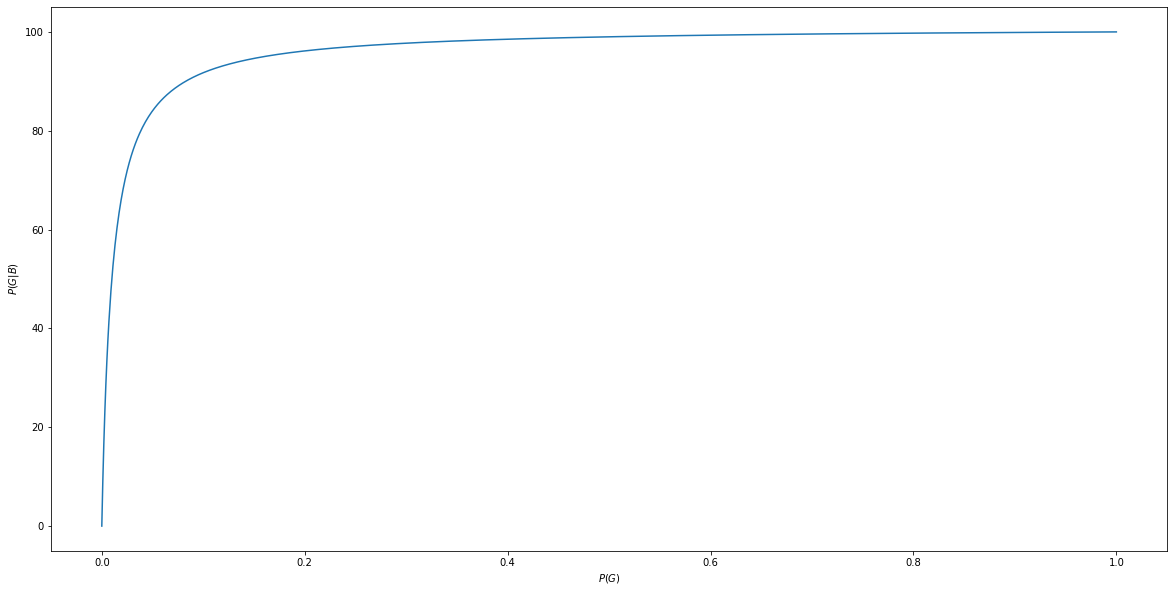

In [2]:
def p_func(p_g):
    return 100 * p_g / (0.99 * p_g + 0.01)
    
p_g = np.linspace(0, 1, 1000)
plt.figure(figsize=(20, 10))
plt.plot(p_g, p_func(p_g))
plt.xlabel('$P(G)$')
plt.ylabel('$P(G|B)$');

Если есть хоть довольно веские доказательства виновности подозреваемого помимо группы крови, то можно делать выводы, то вероятность его вины с учетом крови будет несколько выше.
Например, если хотя бы присутствует 10% вероятностьчто подсудимый виновен,то вероятность его вины с учетом группы крови в районе 92%. 

In [3]:
print(f'{p_func(1/10):.1f}%')

91.7%


## Задание 1.2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. 

В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.


Адвокат оценил вероятность виновности случайно выбранного человека из города с населением 1 млн с редкой группой крови. Т.е. при априорной вероятности $P(G) = \frac{1}{1000000}$ Эта веротяность действительно равна 0.01%, но на самом деле, маловероятно, что все эти люди с редкой группой крови могли бы действительно быть подозреваемыми, например: люди с железным алиби, дети, старики и тд. и тп(думаю, что можно исключить даже в районе 50% людей)

Исключать группу крови из дела будет неправильно, это может сильно уменьшить вероятность виновности подсудимого. 

Например, даже если вероятность вины подозреваемого 1%, то с учетом крови, она могла бы составить 50%

In [4]:
print(f'{p_func(0.01):.1f}%')

50.3%


Можеть быть поэтому адковат попросил исключить настолько важный фактор из дела?:)

## Задание 1.3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


Формулы Байсеса будут выглядить следующим образом

$P(covid=1|test=1) = \frac{P(covid = 1) P(test=1|covid=1)}{P(test=1)} = 
\frac{P(covid = 1) P(test=1|covid=1)}{P(test=1|covid=0)P(covid=0) + P(test=1|covid=1)P(covid=1)}
$

$P(covid=1|test=0) = \frac{P(covid = 1) P(test=0|covid=1)}{P(test=0)} = 
\frac{P(covid = 1) P(test=0|covid=1)}{P(test=0|covid=0)P(covid=0) + P(test=0|covid=1)P(covid=1)}
$



Где $P(covid=1|test=1)$ - вероятность болезни при воложительном тесте 

Где $P(covid=1|test=0)$ - вероятность болезни при отрицательном тесте 


In [5]:
def p_covid(fpr=0.05, fnr=0.05, prior_prob=0.01, test_positive=True):
    if test_positive:
        return prior_prob * (1 - fnr) / (fpr * (1 - prior_prob) + (1 - fnr) * prior_prob)
    else:
        return prior_prob * fnr / ((1 - fpr) * (1 - prior_prob) + fnr * prior_prob)


print(f'{100*p_covid():.1f}%')

16.1%


Text(0, 0.5, '$P(covid=1|test=0)$')

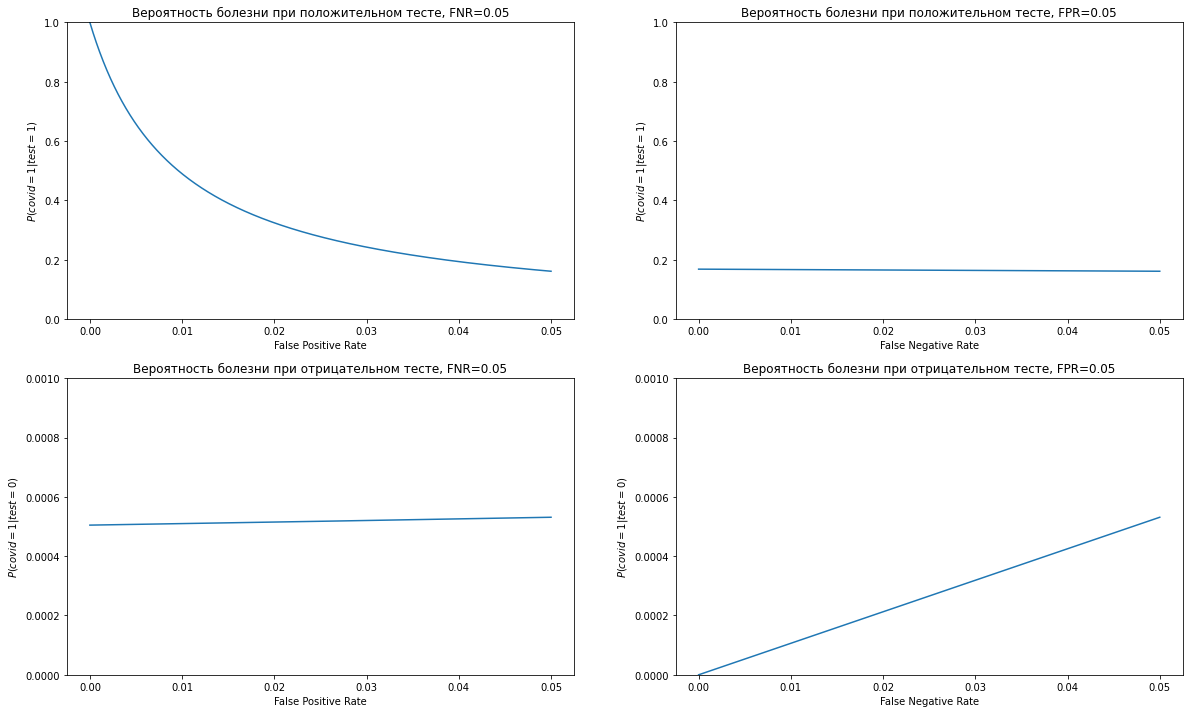

In [6]:
fpr = np.linspace(0, 0.05, 1000)
fnr = np.linspace(0, 0.05, 1000)

y_lim_positive_test = (0, 1)
y_lim_negative_test = (0, 0.001)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

ax1.plot(fpr, p_covid(fpr=fpr, test_positive=True))
ax1.set_ylim(y_lim_positive_test)
ax1.set_title('Вероятность болезни при положительном тесте, FNR=0.05')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('$P(covid=1|test=1)$')


ax2.plot(fnr, p_covid(fnr=fnr, test_positive=True))
ax2.set_ylim(y_lim_positive_test)
ax2.set_title('Вероятность болезни при положительном тесте, FPR=0.05')
ax2.set_xlabel('False Negative Rate')
ax2.set_ylabel('$P(covid=1|test=1)$')

ax3.plot(fpr, p_covid(fpr=fpr, test_positive=False))
ax3.set_ylim(y_lim_negative_test)
ax3.set_title('Вероятность болезни при отрицательном тесте, FNR=0.05')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('$P(covid=1|test=0)$')


ax4.plot(fnr, p_covid(fnr=fnr, test_positive=False))
ax4.set_ylim(y_lim_negative_test)
ax4.set_title('Вероятность болезни при отрицательном тесте, FPR=0.05')
ax4.set_xlabel('False Negative Rate')
ax4.set_ylabel('$P(covid=1|test=0)$')

По условию задачи, мы можем снизить или FP или FN
Пусть у нас есть N жителей, и хотим уменьшить на delta

In [7]:
def decrease_error(N: int, delta: float):

    fpr_effect = (p_covid(fpr=(0.05 - delta), test_positive=True) -
                  p_covid(fpr=0.05, test_positive=True)) * N
    fnr_effect = (p_covid(fnr=0.05, test_positive=False) -
                  p_covid(fnr=(0.05 - delta), test_positive=False)) * N

    print(
        f'Улучшение: {delta} | FPR: {fpr_effect:.0f} из {N} | FNR: {fnr_effect:.0f} из {N}')

In [8]:
decrease_error(100000,0.01)

Улучшение: 0.01 | FPR: 3247 из 100000 | FNR: 11 из 100000



Врачам следует сфокусироваться на уменьшенье FPR

# Часть II: О линейной регрессии


## 1 Загрузка и подготовка данных

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

Скачаем данные и в столбце "new_cases" заменим все нули на единицы,
и вощьмем только данные которые по России с 2020.03.03 


In [9]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.new_cases.replace(0, 1, inplace=True)

df_rus = df[(df.location == "Russia") & (df.date >= "2020-03-03")]
df_rus.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53000,RUS,Europe,Russia,2020-05-20,308705.0,8764.0,9490.571,2972.0,135.0,108.571,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53152,RUS,Europe,Russia,2020-10-19,1406667.0,15843.0,14510.571,24205.0,166.0,230.143,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53273,RUS,Europe,Russia,2021-02-17,4066164.0,12629.0,13990.857,80118.0,459.0,463.571,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53170,RUS,Europe,Russia,2020-11-06,1720063.0,20368.0,18804.286,29654.0,369.0,313.143,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53046,RUS,Europe,Russia,2020-07-05,680283.0,6719.0,6674.286,10145.0,134.0,155.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


Отфильтруем ту часть, которая относится к состоянию дел в России с 3 марта 2020.



In [10]:
df_rus = df[(df.location == "Russia") & (df.date >= "2020-03-03")]
df_rus.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52922,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52923,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52924,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52925,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52926,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


###### Выберем признаки, с которыми будем в дальнейшем работать, а ткаже добавим столбец с логарфимом общего числа зафиксированных случаев



In [11]:
columns = ["date", "total_cases", "new_cases"]
df_rus = df_rus[["date", "total_cases", "new_cases"]]
df_rus["day"] = np.arange(1, len(df_rus) + 1, dtype=int)
df_rus["total_cases_log"] = np.log(df.total_cases)
df_rus.head(5)

,date,total_cases,new_cases,day,total_cases_log
52922,2020-03-03,3.0,1.0,1,1.098612
52923,2020-03-04,3.0,1.0,2,1.098612
52924,2020-03-05,4.0,1.0,3,1.386294
52925,2020-03-06,13.0,9.0,4,2.564949
52926,2020-03-07,13.0,1.0,5,2.564949


###### Разделим данные по обусловленному заданием признаку на тренировочную и тестовую части.



In [12]:
TRAIN_SIZE = 50
df_train, df_test = df_rus[:TRAIN_SIZE], df_rus[TRAIN_SIZE:]
df_train.shape, df_test.shape

((50, 5), (311, 5))

###### Построим графики целевых переменных

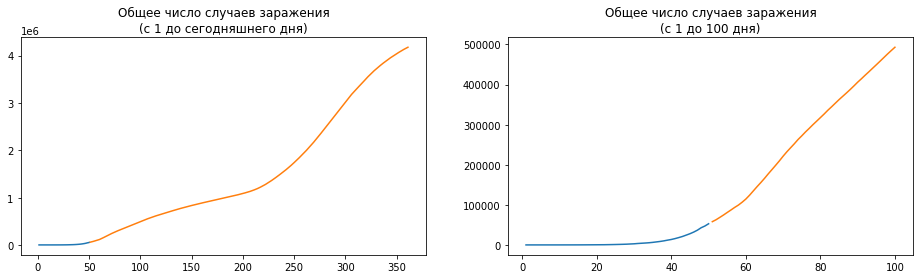

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].margins(0.05)
ax[0].plot(df_train.day, df_train.total_cases,
           label="Данные обучающей выборки")
ax[0].plot(df_test.day, df_test.total_cases, label="Данные тестовой выборки")
ax[0].set_title("Общее число случаев заражения\n(с 1 до сегодняшнего дня)")

ax[1].margins(0.05)
ax[1].plot(df_train.day, df_train.total_cases,
           label="Данные обучающей выборки")
ax[1].plot(df_test.day[:50], df_test.total_cases[:50],
           label="Данные тестовой выборки")
ax[1].set_title("Общее число случаев заражения\n(с 1 до 100 дня)")

plt.show()

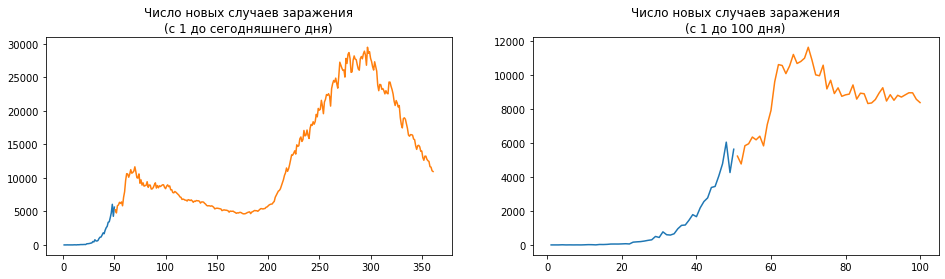

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].margins(0.05)
ax[0].plot(df_train.day, df_train.new_cases, label="Данные обучающей выборки")
ax[0].plot(df_test.day, df_test.new_cases, label="Данные тестовой выборки")
ax[0].set_title("Число новых случаев заражения\n(с 1 до сегодняшнего дня)")

ax[1].margins(0.05)
ax[1].plot(df_train.day, df_train.new_cases, label="Данные обучающей выборки")
ax[1].plot(df_test.day[:50], df_test.new_cases[:50],
           label="Данные тестовой выборки")
ax[1].set_title("Число новых случаев заражения\n(с 1 до 100 дня)")

plt.show()

###### Выделим из наших данных X_train, X_test, y_train, y_test.



In [15]:
X_train = df_train.day.values
X_test = df_test.day.values

In [16]:
y_train_new_cases = np.array(df_train.new_cases)
y_test_new_cases = np.array(df_test.new_cases)
y_train_total_cases = np.array(df_train.total_cases)
y_test_total_cases = np.array(df_test.total_cases)
y_train_log_total_cases = np.array(df_train.total_cases_log)
y_test_log_total_cases = np.array(df_test.total_cases_log)

### 2.1 Построим модель линейной регрессии на основании столбца "total_cases_log"¶


###### Построим модель линейной регрессии



In [17]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train_log_total_cases)
alpha = model.coef_[0]
beta = model.intercept_
print(f"Alpha = {alpha:.4f}\nBeta = {beta:.4f}")

Alpha = 0.1983
Beta = 1.6224


In [18]:
y_pred = model.predict(df_rus.day.values.reshape(-1, 1))
df_rus["prediced_log_total_cases"] = np.array(y_pred)

No handles with labels found to put in legend.


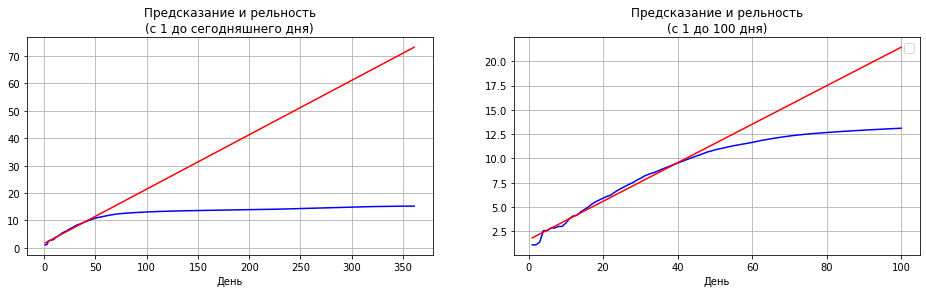

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(df_rus.day,
           df_rus.total_cases_log,
           color='blue')
ax[0].plot(df_rus.day,
           df_rus.prediced_log_total_cases,
           color='red')
ax[0].set(xlabel='День', title='')
ax[0].set_title("Предсказание и рельность\n(с 1 до сегодняшнего дня)")
ax[0].grid()

ax[1].plot(df_rus[:100].day,
           df_rus[:100].total_cases_log,
           color='blue')
ax[1].plot(df_rus[:100].day,
           df_rus[:100].prediced_log_total_cases,
           color='red')
ax[1].set(xlabel='День', title='')
ax[1].set_title("Предсказание и рельность\n(с 1 до 100 дня)")
ax[1].grid()

plt.legend(fontsize='large')
plt.show()

Чем дальше предсказываем, тем менее точно работает наша линейная модель

Переведем данные от логарифмической шкалы к обычному виду


In [20]:
y_pred_exp = np.exp(y_pred)
df_rus["prediced_total_cases"] = np.array(y_pred_exp)

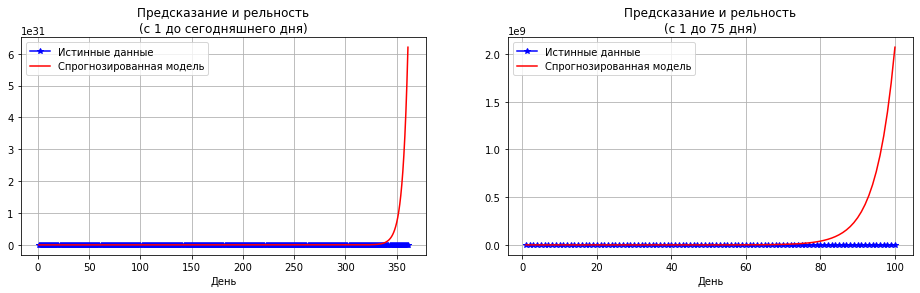

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(df_rus.day,
           df_rus.total_cases,
           color="blue",
           marker="*",
           label="Истинные данные")
ax[0].plot(df_rus.day,
           df_rus.prediced_total_cases,
           color="red",
           label="Спрогнозированная модель")
ax[0].set(xlabel="День", title="Предсказание и рельность\n(с 1 до сегодняшнего дня)")
ax[0].grid()
ax[0].legend()

ax[1].plot(df_rus[:100].day,
           df_rus[:100].total_cases,
           color="blue",
           marker="*",
           label="Истинные данные")
ax[1].plot(df_rus[:100].day,
           df_rus[:100].prediced_total_cases,
           color="red",
           label="Спрогнозированная модель")
ax[1].set(xlabel="День", title="Предсказание и рельность\n(с 1 до 75 дня)")
ax[1].grid()
ax[1].legend()



plt.show();

###### Модель сильно отличается от реальных данных, так как при экстраполяции Экспонента очень быстро растет

## 2.2 Найдем апостериорное распределение параметров этой модели для достаточно широкого априорного распределения.

### 2.3 Проведем сэмплирование


In [22]:
date_start = pd.to_datetime("2020-03-03")
date_may = pd.to_datetime("2020-05-01")
date_june = pd.to_datetime("2020-06-01")
date_sept = pd.to_datetime("2020-09-01")

X_may = np.array([[(date_may - date_start).days]])
X_june = np.array([[(date_june - date_start).days]])
X_sept = np.array([[(date_sept - date_start).days]])

y_may_total = int(np.exp(model.predict(X_may)))
y_june_total = int(np.exp(model.predict(X_june)))
y_sept_total = int(np.exp(model.predict(X_sept)))

print(f"К 1 мая: {y_may_total} случаев")
print(f"К 1 июня: {y_june_total} случаев")
print(f"К 1 сентября: {y_sept_total} случаев")

К 1 мая: 610241 случаев
К 1 июня: 285179209 случаев
К 1 сентября: 23869843564137116 случаев


Как можно увидеть, прогнозируемое поведение графика предсказанного числа зараженных сильно отличается от реальности (чему в данном случае остается лишь порадоваться.

### 3.1 Будем использовать для предсказания другую модель, основанную на предложенной в работе (Murray, 2020)


Целевая функция остается y_train_log_total_cases, а X_train - все также остается вводом. Уравнение, описывающее зависимость между параметрами модели, при логарифмировании примет вид квадратного уравнения с неизвестными постоянными коэффициентами. Таким образом мы перейдем к следующему:



In [23]:
X_train_new = np.array([np.square(X_train), X_train]).reshape(2, -1).T
X_test_new = np.array([np.square(X_test), X_test]).reshape(2, -1).T

In [24]:
model_sigm = LinearRegression()

model_sigm.fit(X_train_new, y_train_log_total_cases)


y_pred_new = model_sigm.predict(np.array([np.square(df_rus.day.values),
                                          df_rus.day.values]).reshape(2, -1).T)
y_pred_new = np.exp(y_pred_new)
y_pred_new_total = y_pred_new.cumsum()

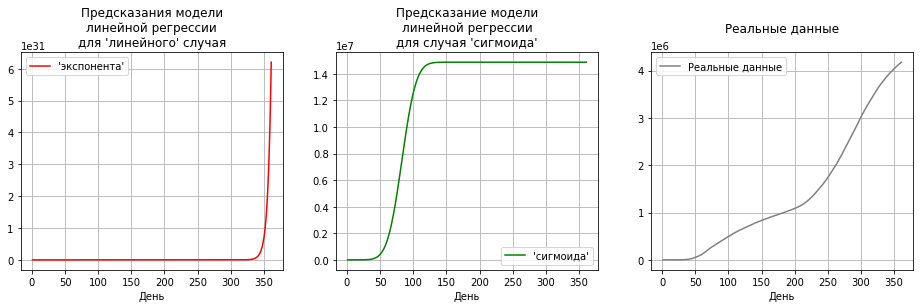

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].plot(df_rus.day,
           df_rus.prediced_total_cases,
           color="red",
           label="'экспонента'")
ax[0].set(xlabel="День", title="Предсказания модели\nлинейной регрессии\nдля 'линейного' случая")
ax[0].grid()
ax[0].legend()

ax[1].plot(df_rus.day,
           y_pred_new_total,
           color="green",
           label="'сигмоида'")
ax[1].set(xlabel="День", title="Предсказание модели\nлинейной регрессии\nдля случая 'сигмоида'")
ax[1].grid()
ax[1].legend()

ax[2].plot(df_rus.day,
           df_rus.total_cases,
           color="gray",
           label="Реальные данные")
ax[2].set(xlabel="День", title="Реальные данные\n")
ax[2].grid()
ax[2].legend()

plt.show()


Видим, что в отличии от экспоненты наша сигмоида имеет "потолок" сверху, и значения хоть и растут, но не так быстро

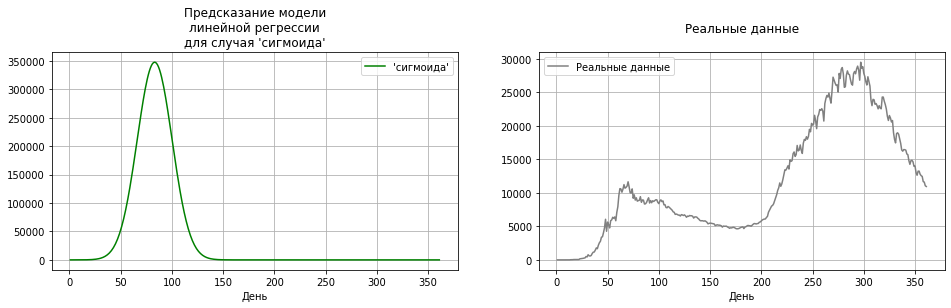

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(df_rus.day,
           y_pred_new,
           color="green",
           label="'сигмоида'")
ax[0].set(xlabel="День", title="Предсказание модели\nлинейной регрессии\nдля случая 'сигмоида'")
ax[0].grid()
ax[0].legend()

ax[1].plot(df_rus.day,
           df_rus.new_cases,
           color="gray",
           label="Реальные данные")
ax[1].set(xlabel="День", title="Реальные данные\n")
ax[1].grid()
ax[1].legend()

plt.show()

Соберем воедино

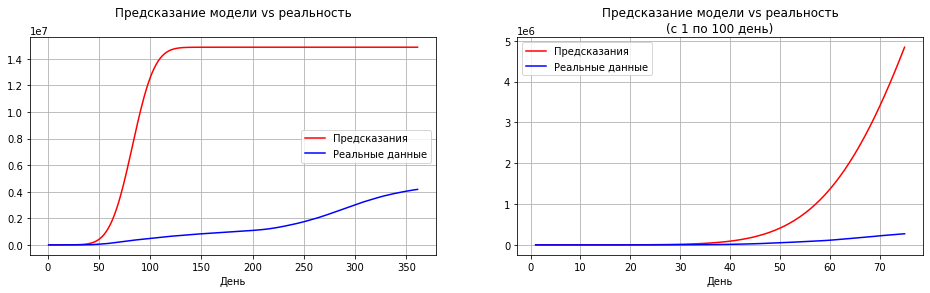

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(df_rus.day,
           y_pred_new_total,
           color="red",
           label="Предсказания")
ax[0].plot(df_rus.day,
           df_rus.total_cases,
           color="blue",
           label="Реальные данные")
ax[0].set(xlabel="День", title="Предсказание модели vs реальность\n")
ax[0].grid()
ax[0].legend()

ax[1].plot(df_rus[:75].day,
           y_pred_new_total[:75],
           color="red",
           label="Предсказания")
ax[1].plot(df_rus.day[:75],
           df_rus.total_cases[:75],
           color="blue",
           label="Реальные данные")
ax[1].set(xlabel="День", title="Предсказание модели vs реальность\n(с 1 по 100 день)")
ax[1].grid()
ax[1].legend()

plt.show;

### 3.2 Повторим поиск признаков новой модели.


In [28]:
alpha1, alpha2, beta = *model_sigm.coef_, model_sigm.intercept_
print("Параметы моедли:\nalpha1 =", alpha1, "\nalpha2 =", alpha2, "\nbeta =", beta)

Параметы моедли:
alpha1 = -0.0017176705041798042 
alpha2 = 0.2858921080490557 
beta = 0.8632358736013366


In [29]:
N = 250
xs = np.linspace(0, 60, N)
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
Z = np.linspace(-5, 5, N)

X, Y, Z = np.meshgrid(X, Y, Z)

pos = np.empty(X.shape + (3,))
pos[:, :, :, 0] = X
pos[:, :, :, 1] = Y
pos[:, :, :, 2] = Z

cur_mu, cur_sigma = np.array([beta, alpha1, alpha2]), 2 * np.eye(3)

### 3.3 Просэмплируем


In [30]:
def sampling(mu, sigma, n=20, points=None):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1] * xs + w[2] * xs ** 2), "k-", lw=.2)
    plt.ylim((0, 5000))
    plt.xlim((0, 50))
    if not points is None:
        plt.scatter(points[0], points[1], marker="*", s=200)
    plt.show()

    
def bayesian_update(mu, sigma, x, y, sn):
    x_matrix = np.array([[1, x, x**2]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sn ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sn ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

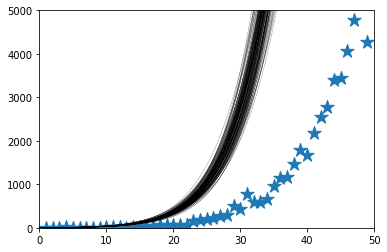

In [31]:
sn = np.std(np.log(y_pred_new_total) - df_rus.total_cases_log)

post_mu, post_sigma = cur_mu, cur_sigma
for i in range(X_train.shape[0]):
    px, py = X_train[i], y_train_log_total_cases[i]
    post_mu, post_sigma = bayesian_update(post_mu, post_sigma, px, py, sn)

sampling(post_mu, post_sigma, 150, points=[df_rus.day, df_rus.new_cases])

post_a, post_b, post_c = post_mu

In [32]:
xs = np.arange(1, 181, 1)
df_new = pd.DataFrame(xs, columns = ["nday"])
df_new["pred"] = np.exp(post_a * xs + post_b * xs**2 + post_c)
df_new["pred_total"] = df_new.pred.cumsum()

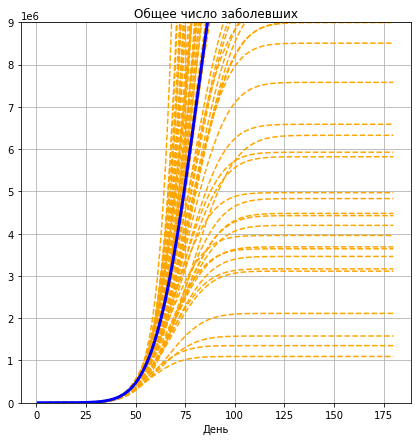

In [33]:
fig, ax = plt.subplots(figsize=(7,7))
plt.ylim(top=9e6)

out = []
for w0_sample, w1_sample, w2_sample in np.random.multivariate_normal(post_mu, post_sigma, 60):
    df_sample = pd.DataFrame(xs, columns = ["nday"])
    df_sample["pred"] = np.exp(w1_sample * xs + w2_sample * xs**2 + w0_sample)
    df_sample["pred_total"] = df_sample.pred.cumsum()
    
    plt.plot(df_sample.nday, df_sample.pred_total.values, color='orange', linestyle='dashed')
    out.append(df_sample.iloc[-1]['pred_total'])

ax.plot(df_sample.nday, y_pred_new_total[df_sample.nday], linewidth=3, c="blue", alpha=1)
ax.set(xlabel="День", title="Общее число заболевших")
ax.grid()

plt.show();

## 4 Рассмотрим модели линейной регрессии, примененные к другим странам


In [34]:
#Страны брал Грузию, Турцию и Украину

countries = ['Turkey', 'Georgia' , 'Ukraine']

df_w = df[["location", "date", "total_cases", "new_cases"]]
df_w.total_cases.replace(np.NaN, 1, inplace=True)
df_w.new_cases.replace(np.NaN, 1, inplace=True)
df_w["total_cases_log"] = np.log(df_w.total_cases, dtype=np.float32)
df_w.sample(10)

,location,date,total_cases,new_cases,total_cases_log
31770,Israel,2020-06-17,19905.0,271.0,9.898726
70039,Vietnam,2021-01-18,1539.0,2.0,7.338888
63282,Taiwan,2020-10-31,555.0,1.0,6.318968
40805,Mauritania,2020-03-17,1.0,1.0,0.000000
17294,Democratic Republic of Congo,2020-08-13,9589.0,51.0,9.168372
11569,Cameroon,2020-10-13,21203.0,1.0,9.961898
48131,Oceania,2020-01-27,5.0,1.0,1.609438
1989,Angola,2020-08-09,1672.0,100.0,7.421776
16692,Cyprus,2020-12-09,13286.0,1.0,9.494466
25103,Germany,2020-08-20,231292.0,1586.0,12.351437


In [35]:
model_lr = LinearRegression()
parameters = []

In [36]:
for country in countries:
    #print(f'Страна: {country}')
    df_w_p = df_w[(df_w.location == country) & (df_w.total_cases >= 2)]
    df_w_p["day"] = np.arange(1, len(df_w_p) + 1, dtype = int)
        
    X_train_p = df_w_p.day[:TRAIN_SIZE].values
    X_test_p = df_w_p.day.values

    X_train_p_new = np.array([X_train_p, np.square(X_train_p)], dtype=int).T
    X_test_p_new = np.array([X_test_p, np.square(X_test_p)], dtype=int).T
    
        
    y_train_p_new = np.array(df_w_p[:TRAIN_SIZE].total_cases_log, dtype=np.float32)
    try:
        model_lr.fit(X_train_p_new, y_train_p_new)

        pred_p_new = np.exp(model_lr.predict(X_test_p_new), dtype=np.float32)
        pred_p_new_total = pred_p_new.cumsum()
        parameters.append((country, *model_lr.coef_))
    except ValueError:
        pass
    


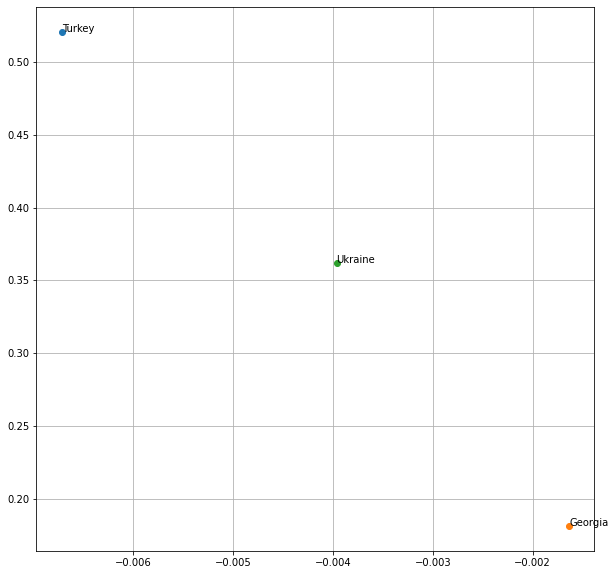

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
for entry in parameters:
    x, y = entry[2], entry[1]
    ax.scatter(x, y)
    ax.annotate(entry[0], (x, y))
ax.grid()

### Построим также графики



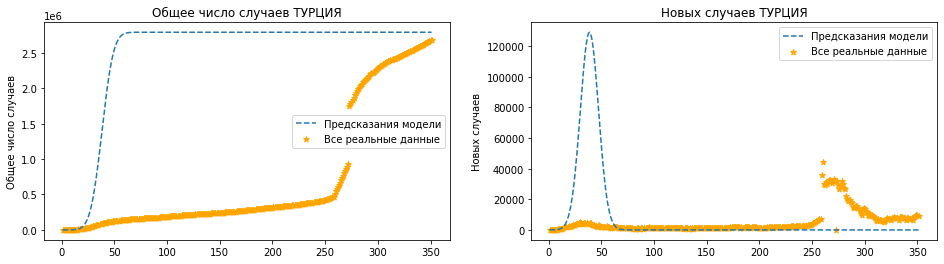

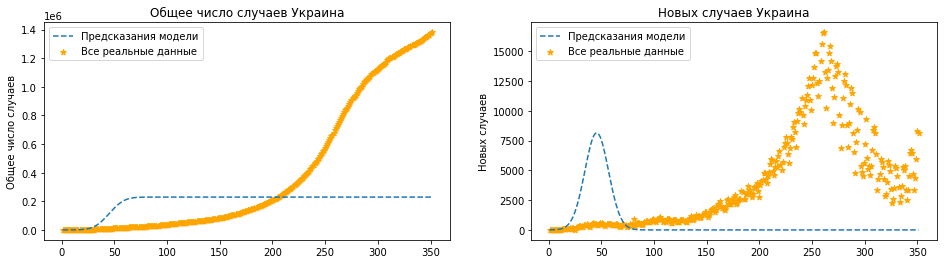

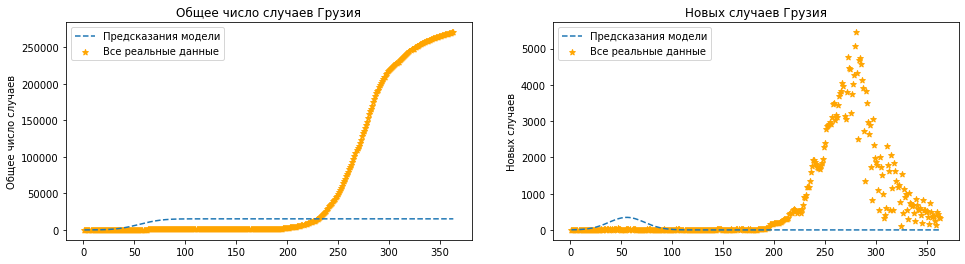

In [38]:
# Для Турции
df_Turkey = df_w[(df_w.location == "Turkey") & (df_w.total_cases >= 2)]
df_Turkey["day"] = np.arange(1, len(df_Turkey) + 1, dtype=int)

X_train_p = df_Turkey.day[:TRAIN_SIZE].values
X_test_p = df_Turkey.day.values

X_train_p_new = np.array([X_train_p, np.square(X_train_p)], dtype=int).T
X_test_p_new = np.array([X_test_p, np.square(X_test_p)], dtype=int).T

y_train_p_new = np.array(
    df_Turkey[:TRAIN_SIZE].total_cases_log, dtype=np.float32)

model_lr.fit(X_train_p_new, y_train_p_new)

pred_p_new = np.exp(model_lr.predict(X_test_p_new), dtype=np.float32)
pred_p_new_total = pred_p_new.cumsum()

fig, axis = plt.subplots(1, 2, figsize=(16, 4))

axis[0].plot(X_test_p, pred_p_new_total,
             label=f"Предсказания модели", linestyle="--")
axis[0].scatter(X_test_p, df_Turkey.total_cases,
                label=f"Все реальные данные", marker="*", color="orange")
axis[0].set_ylabel("Общее число случаев")
axis[0].set_title("Общее число случаев ТУРЦИЯ")
axis[0].legend()

axis[1].plot(X_test_p, pred_p_new,
             label=f"Предсказания модели", linestyle="--")
axis[1].scatter(X_test_p, df_Turkey.new_cases,
                label=f"Все реальные данные", marker="*", color="orange")
axis[1].set_ylabel("Новых случаев")
axis[1].set_title("Новых случаев ТУРЦИЯ")
axis[1].legend()

plt.show()


# Для Украины
df_Ukraine = df_w[(df_w.location == "Ukraine") & (df_w.total_cases >= 2)]
df_Ukraine["day"] = np.arange(1, len(df_Ukraine) + 1, dtype=int)

X_train_p = df_Ukraine.day[:TRAIN_SIZE].values
X_test_p = df_Ukraine.day.values

X_train_p_new = np.array([X_train_p, np.square(X_train_p)], dtype=int).T
X_test_p_new = np.array([X_test_p, np.square(X_test_p)], dtype=int).T

y_train_p_new = np.array(
    df_Ukraine[:TRAIN_SIZE].total_cases_log, dtype=np.float32)

model_lr.fit(X_train_p_new, y_train_p_new)

pred_p_new = np.exp(model_lr.predict(X_test_p_new), dtype=np.float32)
pred_p_new_total = pred_p_new.cumsum()

fig, axis = plt.subplots(1, 2, figsize=(16, 4))

axis[0].plot(X_test_p, pred_p_new_total,
             label=f"Предсказания модели", linestyle="--")
axis[0].scatter(X_test_p, df_Ukraine.total_cases,
                label=f"Все реальные данные", marker="*", color="orange")
axis[0].set_ylabel("Общее число случаев")
axis[0].set_title("Общее число случаев Украина")
axis[0].legend()

axis[1].plot(X_test_p, pred_p_new,
             label=f"Предсказания модели", linestyle="--")
axis[1].scatter(X_test_p, df_Ukraine.new_cases,
                label=f"Все реальные данные", marker="*", color="orange")
axis[1].set_ylabel("Новых случаев")
axis[1].set_title("Новых случаев Украина")
axis[1].legend()

plt.show()


# Для Грузии
df_Georgia = df_w[(df_w.location == "Georgia") & (df_w.total_cases >= 2)]
df_Georgia["day"] = np.arange(1, len(df_Georgia) + 1, dtype=int)

X_train_p = df_Georgia.day[:TRAIN_SIZE].values
X_test_p = df_Georgia.day.values

X_train_p_new = np.array([X_train_p, np.square(X_train_p)], dtype=int).T
X_test_p_new = np.array([X_test_p, np.square(X_test_p)], dtype=int).T

y_train_p_new = np.array(
    df_Georgia[:TRAIN_SIZE].total_cases_log, dtype=np.float32)

model_lr.fit(X_train_p_new, y_train_p_new)

pred_p_new = np.exp(model_lr.predict(X_test_p_new), dtype=np.float32)
pred_p_new_total = pred_p_new.cumsum()

fig, axis = plt.subplots(1, 2, figsize=(16, 4))

axis[0].plot(X_test_p, pred_p_new_total,
             label=f"Предсказания модели", linestyle="--")
axis[0].scatter(X_test_p, df_Georgia.total_cases,
                label=f"Все реальные данные", marker="*", color="orange")
axis[0].set_ylabel("Общее число случаев")
axis[0].set_title("Общее число случаев Грузия")
axis[0].legend()

axis[1].plot(X_test_p, pred_p_new,
             label=f"Предсказания модели", linestyle="--")
axis[1].scatter(X_test_p, df_Georgia.new_cases,
                label=f"Все реальные данные", marker="*", color="orange")
axis[1].set_ylabel("Новых случаев")
axis[1].set_title("Новых случаев Грузия")
axis[1].legend()

plt.show()